# Transforming, Grouping & Sorting Data

Copyright © Wendy Lee 2022

## Data transformation
A **map** is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values. In data science we often have a need for creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later. Maps are what handle this work, making them extremely important for getting your work done!

There are two mapping methods that you will use often: `map()` and `apply()`


In [ ]:
import pandas as pd
csvurl="https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv"

wine = pd.read_csv(csvurl)
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65494,65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre
65495,65495,Australia,"This is a big, fat, almost sweet-tasting Caber...",NaN,90,22.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Tapestry 2005 Cabernet Sauvignon (McLaren Vale),Cabernet Sauvignon,Tapestry
65496,65496,US,"Much improved over the unripe 2005, Fritz's 20...",Estate,90,20.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Fritz 2006 Estate Sauvignon Blanc (Dry Creek V...,Sauvignon Blanc,Fritz
65497,65497,US,This wine wears its 15.8% alcohol better than ...,Block 24,90,31.0,California,Napa Valley,Napa,NaN,NaN,Hendry 2004 Block 24 Primitivo (Napa Valley),Primitivo,Hendry


In [ ]:
wine.drop(wine.columns[[0]], axis=1, inplace=True) # remove first column directly in wine dataframe
pd.set_option("display.max_rows", 10)
wine.info()
wine.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                65467 non-null  object 
 1   description            65499 non-null  object 
 2   designation            46588 non-null  object 
 3   points                 65499 non-null  int64  
 4   price                  60829 non-null  float64
 5   province               65467 non-null  object 
 6   region_1               54744 non-null  object 
 7   region_2               25170 non-null  object 
 8   taster_name            51856 non-null  object 
 9   taster_twitter_handle  49467 non-null  object 
 10  title                  65499 non-null  object 
 11  variety                65499 non-null  object 
 12  winery                 65499 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 6.5+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo



## `Map()` ##
Suppose that we wanted to remean wine points to zero by subtracting the mean score from the score of each wine. Once subtracted the points by the mean, we can see how the points vary about the mean. We will be using a <i>**lambda function**</i> in this example. You can review Python lambda function [here](https://www.w3schools.com/python/python_lambda.asp).

In [ ]:
def function_x(x):
    return x+5
print(function_x(10))

# lambda arg: expression
a = lambda x: x+5 #single line function definition
print(a(2))

15
7


In [ ]:
# To remean the wine points by subracting the points by the mean.
# We can do this as follows
# First, find the mean
wine_points_mean = wine.points.mean()
wine_points_mean

88.43403716087269

In [ ]:
def remean(point):
    return point - wine_points_mean

In [ ]:
# remean the points column using map()
wine.points.map(lambda p: p - wine_points_mean)
# wine.points

0       -1.434037
1       -1.434037
2       -1.434037
3       -1.434037
4       -1.434037
           ...   
65494    1.565963
65495    1.565963
65496    1.565963
65497    1.565963
65498    1.565963
Name: points, Length: 65499, dtype: float64

In [ ]:
def remean(p):
    return p - wine_points_mean

remeaned_pts = wine.points.map(remean)
wine['remeaned_pts'] = remeaned_pts

In [ ]:
# Alternative way without using map or apply to do remeaning
remeaned_points = wine.points - wine_points_mean #faster than map or apply
remeaned_points

0       -1.434037
1       -1.434037
2       -1.434037
3       -1.434037
4       -1.434037
           ...   
65494    1.565963
65495    1.565963
65496    1.565963
65497    1.565963
65498    1.565963
Name: points, Length: 65499, dtype: float64

In [ ]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-1.434037


The function you pass to `map()` should <u>expect a single value from the Series</u> (a point value, in the above example), and return a transformed version of that value. `map()` returns a new Series where all the values have been transformed by your function.

In [ ]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-1.434037


#### Let's create a new column called Star, which stores the values of number of stars depending on the points the wine received.
-  \>85 - 5 stars
-  between 80 and 85 - 4 stars
-  between 75 and 80 - 3 stars
-  below 75 - 2 stars

In [ ]:
# create function to do transformation for map()
# since we are only looking at points, we don't need to use apply
def get_star(x): # x is going to be a value from the Series
    if x > 85:
        return 5
    elif 80 < x <= 85:
        return 4
    elif 75 < x <= 80:
        return 3
    else:
        return 2

stars = wine.points.map(get_star) # should return a Series that contains the star values

wine['Star'] = stars
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037,5
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037,5
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037,5
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-1.434037,5


In [ ]:
wine['Star'].value_counts()
print(wine['points'].value_counts())

87     8872
88     8423
90     7697
86     6179
91     6016
       ... 
80      155
97       99
98       39
99       15
100       8
Name: points, Length: 21, dtype: int64


#### Let's try to use `apply()` to assign the star values based on the points

In [ ]:
def get_star2(x): # x is a Series, row by row
    if x.points > 85:
        return 5
    elif 80 < x.points <= 85:
        return 4
    elif 75 < x.points <= 80:
        return 3
    else:
        return 2

wine['Star2'] = wine.apply(get_star2, axis='columns')


In [ ]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037,5,5
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5,5
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037,5,5
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037,5,5
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-1.434037,5,5





## `apply()` ##
`apply()` is the equivalent method if we want to <u>transform the whole DataFrame</u> by calling a custom method on each row.

In [ ]:
pd.set_option("display.max_rows", 10)
print(wine.iloc[0,:]['points'])
wine.iloc[0,:].points

87


87

In [ ]:
# Here is an example of using apply()
def remean_points(row):
    row.points = row.points - wine_points_mean
    return row

wine.apply(remean_points, axis='columns') # apply to each row in the column(s) //go through each row. splitting by columns

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.434037,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037,5,5
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.434037,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5,5
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,-1.434037,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037,5,5
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,-1.434037,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037,5,5
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,-1.434037,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-1.434037,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,1.565963,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre,1.565963,5,5
65495,Australia,"This is a big, fat, almost sweet-tasting Caber...",NaN,1.565963,22.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Tapestry 2005 Cabernet Sauvignon (McLaren Vale),Cabernet Sauvignon,Tapestry,1.565963,5,5
65496,US,"Much improved over the unripe 2005, Fritz's 20...",Estate,1.565963,20.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Fritz 2006 Estate Sauvignon Blanc (Dry Creek V...,Sauvignon Blanc,Fritz,1.565963,5,5
65497,US,This wine wears its 15.8% alcohol better than ...,Block 24,1.565963,31.0,California,Napa Valley,Napa,NaN,NaN,Hendry 2004 Block 24 Primitivo (Napa Valley),Primitivo,Hendry,1.565963,5,5


#Map vs Apply

Map uses a passed function to map every value of the series. returns series

Apply goes through whole df, and modifies it according to the passed function. axis=columns, go row by row. axis=rows, go column by column.

In [ ]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037,5,5
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5,5
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037,5,5
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037,5,5
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-1.434037,5,5


Notice that we had called `wine.apply()` with `axis='columns'`. If we had used `axis='index'`, then instead of passing a function to transform each row, we would need to provide a function to transform each column for the row(s).

**Note:**
`map()` and `apply()` **return new, transformed Series and DataFrames, respectively**. They <i>**don't modify**</i> the original data they're called on. If we look at the first row of reviews, we can see that it still has its original points value.

### Smart pandas: ###
Pandas provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column:

In [ ]:
wine_points_mean = wine.points.mean()
print(wine_points_mean)
print("This is a Series")
print(wine.points)
wine.points - wine_points_mean

88.43403716087269
This is a Series
0        87
1        87
2        87
3        87
4        87
         ..
65494    90
65495    90
65496    90
65497    90
65498    90
Name: points, Length: 65499, dtype: int64


0       -1.434037
1       -1.434037
2       -1.434037
3       -1.434037
4       -1.434037
           ...   
65494    1.565963
65495    1.565963
65496    1.565963
65497    1.565963
65498    1.565963
Name: points, Length: 65499, dtype: float64

In this code we are performing an operation between a lot of values on the left-hand side (everything in the Series) and a single value on the right-hand side (the mean value). Pandas looks at this expression and figures out that we must mean to subtract that mean value from every value in the dataset.

Pandas will also understand what to do if we perform these operations between Series of equal length. For example, an easy way of combining country and region information in the dataset would be to do the following:

In [ ]:
print("a" + " - " + "b")
wine.country + " - " + wine.region_1
# wine.country.value_counts()

a - b


US                        27177
France                    11174
Italy                     10005
Spain                      3409
Portugal                   2963
                          ...  
Switzerland                   4
Luxembourg                    4
Armenia                       1
Bosnia and Herzegovina        1
Slovakia                      1
Name: country, Length: 41, dtype: int64

### Smart pandas are not as flexible
Using standard Python operators are faster than `map()` or `apply()` because they uses speed ups built into pandas. All of the standard Python operators (`>`, `<`, `==`, and so on) work in this manner.

However, they are not as flexible as `map()` or `apply()`, which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.

# Groupwise analysis
Recall from Lecture 4, any time we see a question involving the words ”how many ... for each ...” the answer is `value_counts`. We can replicate what `value_counts()` does by doing the following:

In [ ]:
wine.groupby('points').points.count()

points
80      155
81      305
82      923
83     1442
84     3490
       ... 
96      262
97       99
98       39
99       15
100       8
Name: points, Length: 21, dtype: int64

<Axes: >

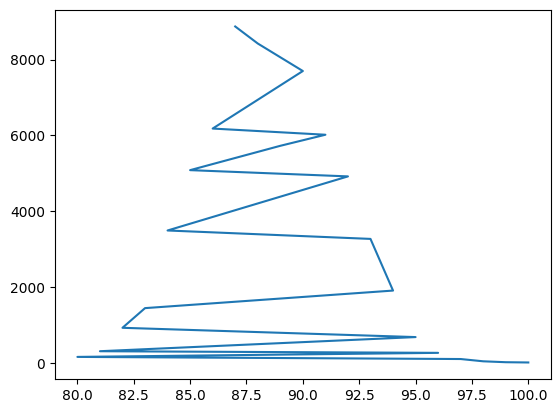

In [ ]:
wine.points.value_counts().plot()


In [ ]:
wine.points.value_counts().sort_index()


80      155
81      305
82      923
83     1442
84     3490
       ... 
96      262
97       99
98       39
99       15
100       8
Name: points, Length: 21, dtype: int64

In [ ]:
wine[(wine.points.between(87,90))].points.value_counts().sort_index()


87    8872
88    8423
89    5724
90    7697
Name: points, dtype: int64

`groupby()` created a group of reviews which allotted the same point values to the given wines. Then, for each of these groups, we grabbed the `points()` column and counted how many times it appeared. value_counts() is just a shortcut to this `groupby()` operation.

We can use any of the summary functions with this data. For example, to get the cheapest wine in each point value category, we can do the following:

<Axes: xlabel='points'>

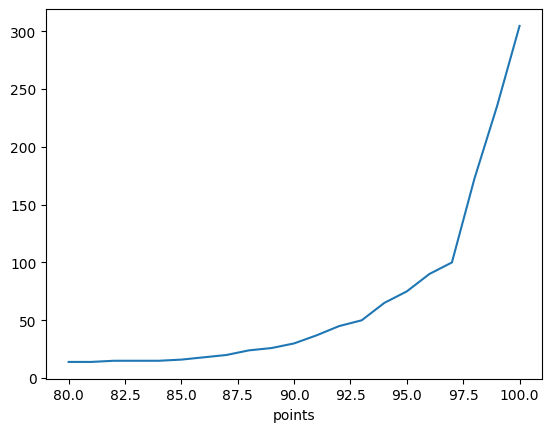

In [ ]:
wine.groupby('points').price.median().plot()

In [ ]:
wine.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037,5,5
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5,5
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037,5,5


You can think of each group we generate as being a slice of our DataFrame containing only data with values that match. This DataFrame is accessible to us directly using the `apply()` method, and we can then manipulate the data in any way we see fit. For example, here's one way of selecting the name of the first wine reviewed from each winery in the dataset:

In [ ]:
wine.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                                     1+1=3 NV Rosé Sparkling (Cava)
10 Knots                            10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine              100 Percent Wine 2015 Moscato (California)
1000 Stories           1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green                  1070 Green 2011 Sauvignon Blanc (Rutherford)
                                             ...                        
Órale                       Órale 2011 Cabronita Red (Santa Ynez Valley)
Öko                    Öko 2013 Made With Organically Grown Grapes Ma...
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 13549, dtype: object

For even more fine-grained control, you can also group by more than one column. For an example, here's how we would pick out the best wine (highest points) by country and province:

In [ ]:
wine.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
Armenia   Armenia             Armenia   
Australia Australia Other   Australia   
          New South Wales   Australia   
...                               ...   
Uruguay   Juanico             Uruguay   
          Montevideo          Uruguay   
          Progreso            Uruguay   
          San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If you love massive Argentine reds with purity...   
          Other             This single-vineyard Malbec blend from vineyar...   
Armenia   Armenia           Medium straw in the glass, this wine has a nos...   
Australia Australia Other   Writes the book on how to make a wine filled w...   
          New South Wales   This is full and rich but not overly heavy or ...   
...                                                                       ...   
Uruguay   Juanico           This mature Bordeaux-style blend is earthy on ...   
          Montevideo        A rich, heady bouquet offers aromas of blackbe...   
          Progreso          RPF is regularly one of Uruguay's better Tanna...   
          San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                                                  designation  \
country   province                                                              
Argentina Mendoza Province  Finca Pedregal Single Vineyard Barrancas Maipú...   
          Other                                                  Chañar Punco   
Armenia   Armenia                                              Estate Bottled   
Australia Australia Other                                       Sarah's Blend   
          New South Wales                                            Botrytis   
...                                                                       ...   
Uruguay   Juanico                            Preludio Barrel Select Lote N 77   
          Montevideo                  Monte Vide Eu Tannat-Merlot-Tempranillo   
          Progreso                                                        RPF   
          San Jose                                   El Preciado Gran Reserva   
          Uruguay                                   Blend 002 Limited Edition   

                            points  price          province  \
country   province                                            
Argentina Mendoza Province      95   74.0  Mendoza Province   
          Other                 94   68.0             Other   
Armenia   Armenia               87   14.0           Armenia   
Australia Australia Other       93   15.0   Australia Other   
          New South Wales       91   19.0   New South Wales   
...                            ...    ...               ...   
Uruguay   Juanico               90   45.0           Juanico   
          Montevideo            91   60.0        Montevideo   
          Progreso              88   20.0          Progreso   
          San Jose              87   50.0          San Jose   
          Uruguay               91   22.0           Uruguay   

                                           region_1 region_2  \
country   province                                             
Argentina Mendoza Province                  Mendoza      NaN   
          Other                    Calchaquí Valley      NaN   
Armenia   Armenia                               NaN      NaN   
Australia Australia Other   South Eastern Australia      NaN   
          New South Wales                  Riverina      NaN   
...                                             ...      ...   
Uruguay   Juanico                               NaN     

In [ ]:
wine[wine.points == 100]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,11.565963,5,5
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,11.565963,5,5
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug,11.565963,5,5
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,11.565963,5,5
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,11.565963,5,5
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi,11.565963,5,5
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,11.565963,5,5
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,11.565963,5,5


Another `groupby()` method worth mentioning is `agg()`, which lets you run a bunch of different functions on your DataFrame simultaneously. For example, we can generate a simple statistical summary of the dataset as follows:

In [ ]:
wine.groupby(['country']).winery.nunique()

country
Argentina                  416
Armenia                      1
Australia                  350
Austria                    209
Bosnia and Herzegovina       1
                          ... 
Switzerland                  3
Turkey                      12
US                        4491
Ukraine                      2
Uruguay                     17
Name: winery, Length: 41, dtype: int64

In [ ]:
import numpy as np
wine.groupby(['country']).price.agg([len, min, max, np.mean])

,len,min,max,mean
country,,,,
Argentina,1907,4.0,230.0,23.604663
Armenia,1,14.0,14.0,14.000000
Australia,1177,6.0,850.0,35.786701
Austria,1635,7.0,150.0,30.846774
Bosnia and Herzegovina,1,13.0,13.0,13.000000
...,...,...,...,...
Switzerland,4,30.0,160.0,97.000000
Turkey,43,15.0,120.0,25.767442
US,27177,4.0,750.0,36.344889


Effective use of `groupby()` will allow you to do lots of really powerful things with your dataset.

## Multi-indexes
In all of the examples we've seen thus far we've been working with DataFrame or Series objects with a single-label index. `groupby()` is slightly different in the fact that, depending on the operation we run, it will sometimes result in what is called a multi-index.

A multi-index differs from a regular index in that it has multiple levels. For example:

In [ ]:
countries_wine = wine.groupby(['country', 'province']).description.agg([len])
countries_wine

len
country   province              
Argentina Mendoza Province  1635
          Other              272
Armenia   Armenia              1
Australia Australia Other    131
          New South Wales     34
...                          ...
Uruguay   Juanico              8
          Montevideo          10
          Progreso             5
          San Jose             3
          Uruguay              7

[385 rows x 1 columns]

In [ ]:
mi = countries_wine.index
type(mi)

pandas.core.indexes.multi.MultiIndex

Multi-indices have several methods for dealing with their tiered structure which are absent for single-level indices. They also require two levels of labels to retrieve a value. Dealing with multi-index output is a common "gotcha" for users new to pandas.

The use cases for a multi-index are detailed alongside instructions on using them in the [MultiIndex / Advanced Selection](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) section of the pandas documentation.

However, in general the multi-index method you will use most often is the one for converting back to a regular index, the `reset_index()` method:

In [ ]:
countries_wine.reset_index()

,country,province,len
0,Argentina,Mendoza Province,1635
1,Argentina,Other,272
2,Armenia,Armenia,1
3,Australia,Australia Other,131
4,Australia,New South Wales,34
...,...,...,...
380,Uruguay,Juanico,8
381,Uruguay,Montevideo,10
382,Uruguay,Progreso,5
383,Uruguay,San Jose,3


# Sorting
Looking again at `countries_wine` we can see that grouping returns data in index order, not in value order. That is to say, when outputting the result of a `groupby`, the order of the rows is dependent on the values in the index, not in the data.

To get data in the order want it in we can sort it ourselves. The `sort_values()` method is handy for this. `sort_values()` defaults to an ascending sort, where the lowest values go first. However, most of the time we want a descending sort, where the higher numbers go first. That goes thusly:

In [ ]:
countries_wine.sort_values(by='len', ascending=False)

len
country      province          
US           California   18122
             Washington    4308
France       Bordeaux      3014
Italy        Tuscany       2985
US           Oregon        2691
...                         ...
Slovenia     Dolenjska        1
             Kras             1
             Slovenia         1
South Africa Vlootenburg      1
Greece       Beotia           1

[385 rows x 1 columns]

In [ ]:
countries_wine.loc['US'].loc['Colorado']

len    34
Name: Colorado, dtype: int64

We can also sort the dataframe by its index using `sort_index()`

In [ ]:
countries_wine.sort_index()

len
country   province              
Argentina Mendoza Province  1635
          Other              272
Armenia   Armenia              1
Australia Australia Other    131
          New South Wales     34
...                          ...
Uruguay   Juanico              8
          Montevideo          10
          Progreso             5
          San Jose             3
          Uruguay              7

[385 rows x 1 columns]

In [ ]:
wine.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-1.434037,5,5
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5,5


In [ ]:
wine.groupby('country').nunique()

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
country,,,,,,,,,,,,,,,
Argentina,1825,664,16,83,2,27,0,1,1,1825,54,416,16,3,3
Armenia,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
Australia,1141,569,21,94,6,55,0,2,2,1137,57,350,21,3,3
Austria,1547,761,16,85,24,0,0,2,2,1546,48,209,16,2,2
Bosnia and Herzegovina,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Switzerland,4,2,3,3,3,0,0,2,2,4,3,3,3,2,2
Turkey,40,24,9,16,7,0,0,2,1,40,19,12,9,2,2
US,26111,9038,21,144,26,240,17,15,12,26052,210,4491,21,3,3


In [ ]:
wine.groupby('country').nunique().sort_values(by='winery', ascending=False)

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
country,,,,,,,,,,,,,,,
US,26111,9038,21,144,26,240,17,15,12,26052,210,4491,21,3,3
France,10744,3934,21,260,11,357,0,6,6,10543,130,2962,21,3,3
Italy,9554,4292,21,178,10,344,0,5,5,9512,156,2449,21,3,3
Spain,3257,1550,19,130,8,77,0,3,3,3220,104,1096,19,3,3
Argentina,1825,664,16,83,2,27,0,1,1,1825,54,416,16,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Macedonia,6,1,3,2,1,0,0,2,2,6,5,2,3,1,1
Slovakia,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1
Armenia,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1


In [ ]:
wine[wine.price < 18]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,remeaned_pts,Star,Star2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-1.434037,5,5
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-1.434037,5,5
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-1.434037,5,5
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,-1.434037,5,5
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,-1.434037,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65455,Italy,"Made of 85% Sangiovese and 15% Ciliegiolo, thi...",Maremmino,88,13.0,Tuscany,Maremma,NaN,Kerin O’Keefe,@kerinokeefe,Rascioni e Cecconello 2015 Maremmino (Maremma),Red Blend,Rascioni e Cecconello,-0.434037,5,5
65456,US,"Fruit filled aromas of fresh plum, herb and bl...",Dark,88,11.0,America,NaN,NaN,Sean P. Sullivan,@wawinereport,Original House Wine 2015 Dark Cabernet Sauvign...,Cabernet Sauvignon,Original House Wine,-0.434037,5,5
65481,Argentina,Chakana strikes again with this excellent valu...,NaN,90,11.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Chakana 2006 Malbec (Mendoza),Malbec,Chakana,1.565963,5,5
65482,Australia,Taylors (exported under the Wakefield Estate l...,NaN,90,17.0,South Australia,Clare Valley,NaN,Joe Czerwinski,@JoeCz,Wakefield 2004 Cabernet Sauvignon (Clare Valley),Cabernet Sauvignon,Wakefield,1.565963,5,5
